In [ ]:
2# Install RDKit on colab
# %%capture
!pip install rdkit-pypi
# SNFG : system for nomenclature for glycans
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import os
import difflib
import io
import pandas as pd
from rdkit.Chem import rdFMCS
IPythonConsole.ipython_useSVG=False

!pip install pubchempy
import pubchempy as pubchem

from pathlib import Path
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

import shutil
# !pip install pychem
import json

print(os.getcwd())




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13837 sha256=36adffb375dac915fb53488a2982dbcfb8e5c90ce2aa60200c9e3665e178e7a7
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
Mounted at /content/drive
/content


In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Galectin_Inhibitors.csv to Galectin_Inhibitors.csv


In [ ]:
# df = pd.read_csv(io.BytesIO(uploaded['Galectin_Inhibitors.csv']))
data = pd.read_csv('Galectin_Inhibitors.csv', sep = '\t' )
# set(data['SMILES String'])
test_list = []
for i in set(data['SMILES String']):
  test_list.append(i)

print(test_list)
print(len(test_list)) # unique smile strings


# print(SmileCidKV)
# print(len(SmileCidKV))




['CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)NC2=CC=CC=C2)O', 'C1=C(N=NN1CCOCCOCCO[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)O)O)O)O)CO[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)CO)O[C@H]5[C@@H]([C@H]([C@H]([C@H](O5)CO)O)O)O)O)O', 'C1=CC(=CC(=C1)O)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)S[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)O)O)CO)O', 'C1=CC(=CC(=C1)I)S[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O', 'CC1=C(C=C(C=C1)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)OC)CO)O)C', 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC4=CC=CC=C4C=C3)O', 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[C@@H]([C@@H]4O)OC)CO)O', 'C1=CC=C(C(=C1)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)O)O)CO)O)F', 'C(CO[C@H]1C([C@H]([C@@H](C(O1)CO)O[C@H]2C([C@H](C(C(O2)CO)O)O)O)O)O)N=[N+]=[N-]', 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[

In [ ]:
data = pd.read_csv('Galectin_Inhibitors.csv', sep = '\t' )

unique_compounds = set(data['SMILES String'])

smileCIDkv = {}

for smiles in unique_compounds:
  smileCIDkv[smiles] = data.loc[data['SMILES String'] == smiles, 'PubChem CID'].values.tolist()[0]

# kv of smile strings and cid
print(smileCIDkv)
print('Unique Compounds:',len(smileCIDkv))


listcomp = []
for i in smileCIDkv.keys():
  listcomp.append(i)

count = 0
for i in range(len(test_list)):
  if test_list[i] == listcomp[i]:
    count +=1

# is it all the same?
print(count == len(smileCIDkv))



{'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)NC2=CC=CC=C2)O': 155554894, 'C1=C(N=NN1CCOCCOCCO[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)O)O)O)O)CO[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)CO)O[C@H]5[C@@H]([C@H]([C@H]([C@H](O5)CO)O)O)O)O)O': 122181353, 'C1=CC(=CC(=C1)O)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)S[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)O)O)CO)O': 71562125, 'C1=CC(=CC(=C1)I)S[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O': 122443434, 'CC1=C(C=C(C=C1)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)OC)CO)O)C': 155519777, 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC4=CC=CC=C4C=C3)O': 155539183, 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[C@@H]([C@@H]4O)OC)CO)O': 118707319, 'C1=CC=C(C(=C1)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)O)O)CO)O)F': 137651606, 'C(CO[C@H]1C([C@H]([C@@H](C(O1)CO)O[C@H]2C([C@H](C(C(O2)CO)O)O)O)O)O

In [ ]:
def bitv(mol):
  '''
  Function to get moleculars bitvectors
  With this we can assign these bitvectors to their molecule for future sorting
  Parameters: Molecule Smile String
  Returns: Array with bitvectors
  '''
  bi = {}
  bitv_list = []
  mol1 = Chem.MolFromSmiles(mol)
  fp = AllChem.GetMorganFingerprintAsBitVect(mol1, 10000, nBits=1024, bitInfo = bi)
  fp_arr = np.zeros((2,))
  DataStructs.ConvertToNumpyArray(fp, fp_arr)

  for i in bi:
    bitv_list.append(i)

  return bitv_list


mol_test = 'CCN'
print("Test to see the Bit Vector of Molecule CCN: ",bitv(mol_test))

# prints = [[mol_test, x, bi] for x in fp.GetOnBits()]
# Draw.DrawMorganBits(prints, molsPerRow = 6, legends = [str(x) for x in fp.GetOnBits()])


Test to see the Bit Vector of Molecule CCN:  [33, 80, 147, 294, 789, 981]


In [ ]:
def jaccard(list1, list2):
    # LOOK HERE ALVIN
    # use bitv to change into bvarray
    list1 = bitv(list1)
    list2 = bitv(list2)
    # print('jaccard list 1', list1)
    # print('jaccard list 2', list2)
    # print(set(list1)) #we cant change np.array to a set, that is the issue. WE also can't change it tolist() ?
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    jack = float(intersection) / union
    # print('jaccard is:', jack)
    return jack

<h1> Note that this will take awhile to run


In [ ]:
# data3 = ['C1=CC=C(C=C1)S',
# 'Fc1c(F)c(F)c(Sc2c(F)c(F)c(F)c(F)c2F)c(F)c1F',
# 'C1=CC=C(C=C1)C(=O)N',
# 'C1=CC=C(C=C1)S(=O)(=O)O',
# 'C1=CC=C(C=C1)N']
data3 = test_list[:50]
# print(data3)
data4 = []
[data4.append(i) for i in data3]
# data4 = []


def getClosestJacc(data, a):
  res = []
  [res.append([x, jaccard(a,x)]) for x in data]
  res = sorted(res, key=lambda x:x[1], reverse=True)
  return res[0][0]


a = data3.pop(0)
result = [a]
while data3:
  temp = getClosestJacc(data3, a)
  result.append(temp)
  data3.remove(temp)
  a = temp

print("original molecule list:", data4)
print("CHECKING:", data3)
print("sorted molecule list with Jaccard",result)


original molecule list: ['CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)NC2=CC=CC=C2)O', 'C1=C(N=NN1CCOCCOCCO[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)O)O)O)O)CO[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)CO)O[C@H]5[C@@H]([C@H]([C@H]([C@H](O5)CO)O)O)O)O)O', 'C1=CC(=CC(=C1)O)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)S[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)O)O)CO)O', 'C1=CC(=CC(=C1)I)S[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O', 'CC1=C(C=C(C=C1)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)OC)CO)O)C', 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC4=CC=CC=C4C=C3)O', 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[C@@H]([C@@H]4O)OC)CO)O', 'C1=CC=C(C(=C1)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)O)O)CO)O)F', 'C(CO[C@H]1C([C@H]([C@@H](C(O1)CO)O[C@H]2C([C@H](C(C(O2)CO)O)O)O)O)O)N=[N+]=[N-]', 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O

<h2> Here is the Unsorted List

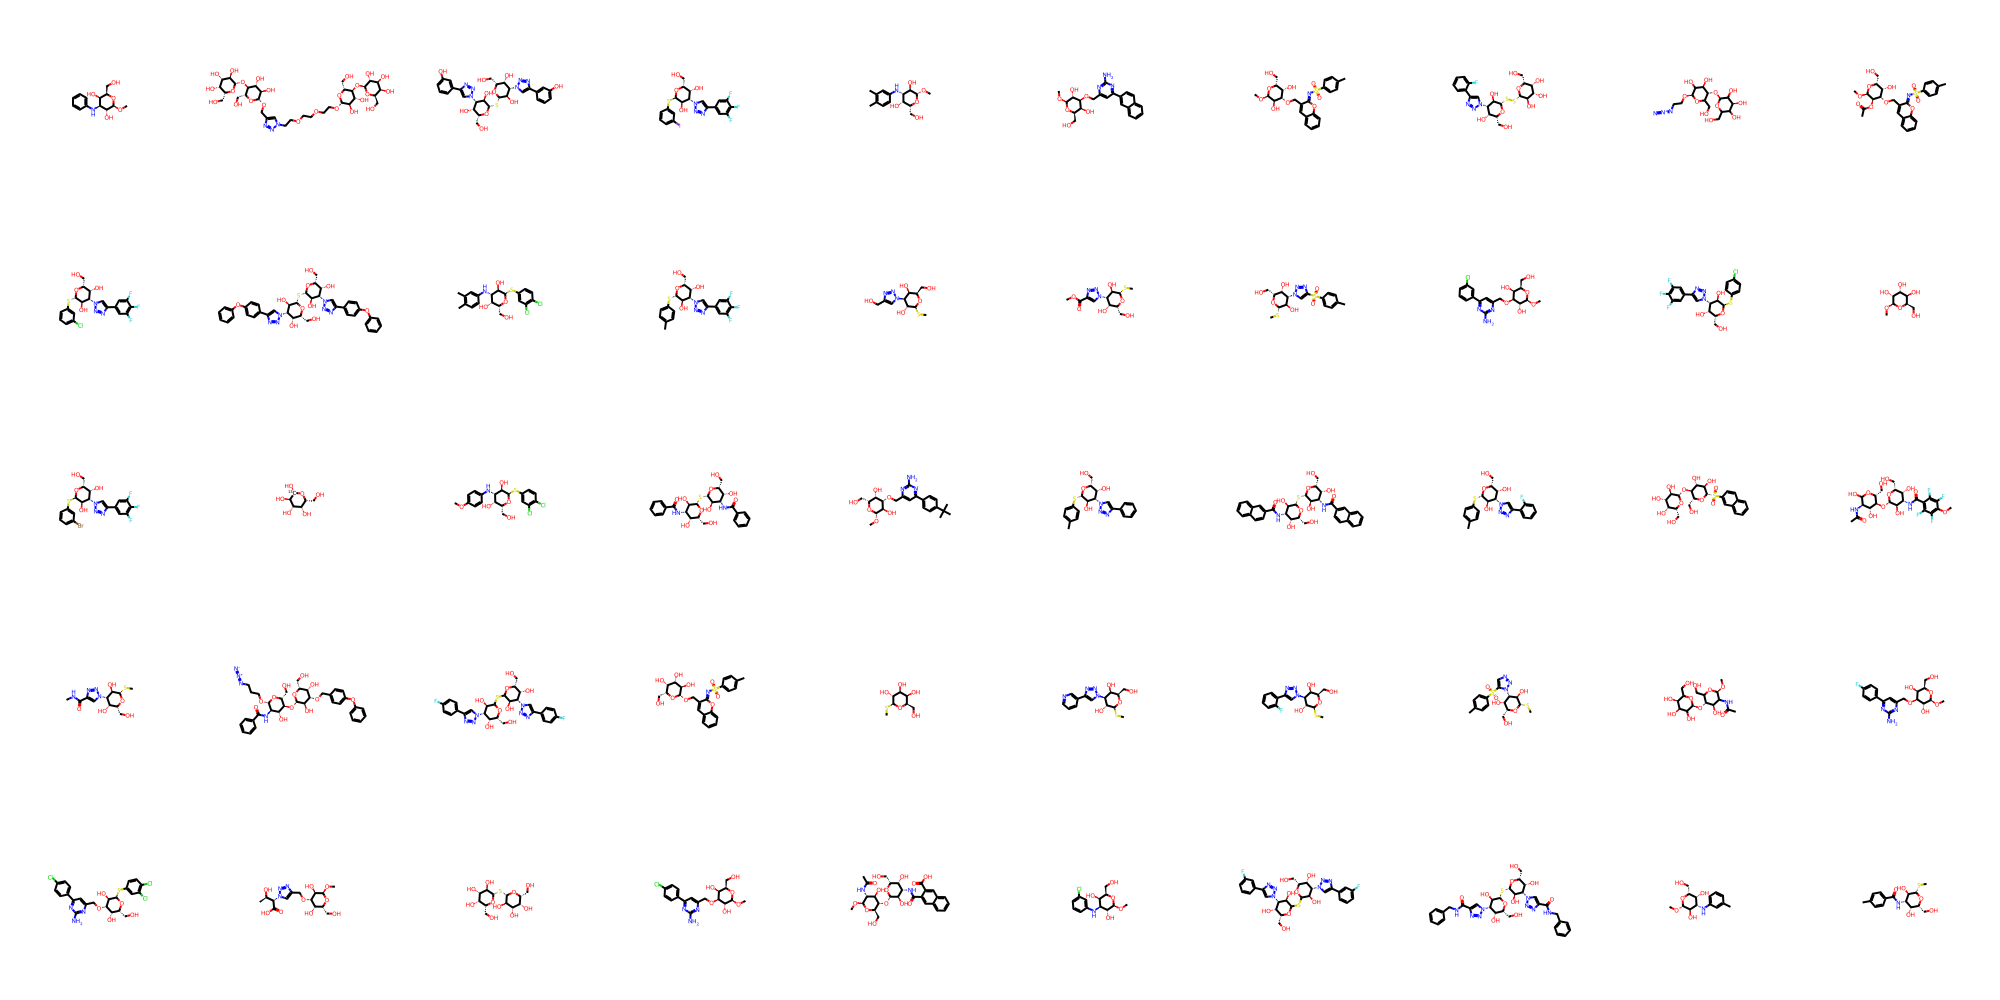

In [ ]:
ms = [Chem.MolFromSmiles(x) for x in data4]
# print(ms)
# for i in data4:
#   print(i)
Draw.MolsToGridImage(ms, molsPerRow=10)

<h2>Below is the Sorted List

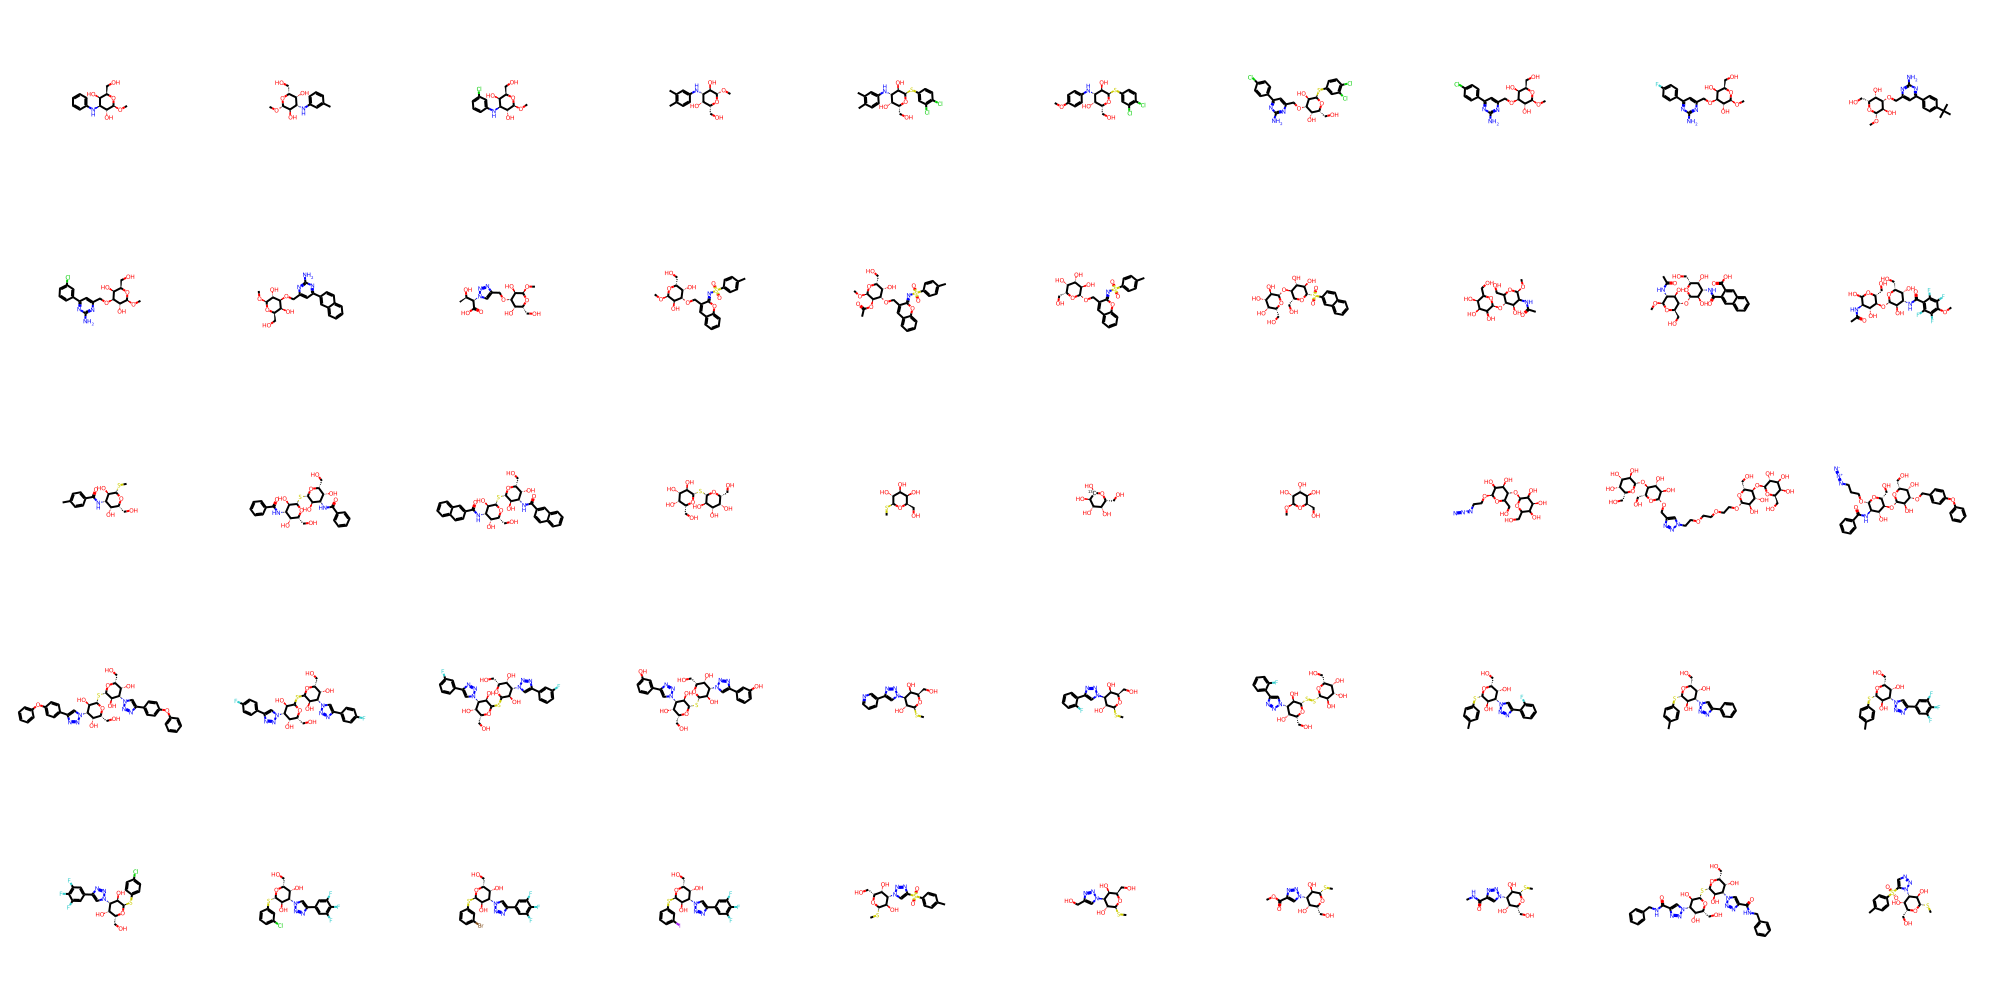

In [ ]:
ms = [Chem.MolFromSmiles(x) for x in result]
# for i in range(len(ms)):
#   print(ms[i])
# objects at locations

Draw.MolsToGridImage(ms, molsPerRow=10)

# Draw.MolsToImage(ms)







In [ ]:
# I am now using a different library, so there may or may not be mismatches?? Not sure, COME BACK TO THIS
# yea some are none ->
# smile: CC1=CC=C(C=C1)S(=O)(=O)/N=C\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@@H]([C@H]([C@@H]([C@H](O4)CO)O[C@H]5[C@@H]([C@H]([C@H]([C@H](O5)CO)O)O)O)O)O
# in our csv: 118707318

# we will now use the dict made above to map each of the sorted list of smiles to their key

def SortedSmilesToCID(sorted_list, smileCIDkv):
  corresponding_cid_from_smiles = []
  for key in sorted_list:
    corresponding_cid_from_smiles.append(smileCIDkv[key])

  return corresponding_cid_from_smiles


SortedSmilesToCID(result, smileCIDkv)


[155554894,
 155538998,
 155563008,
 155519777,
 155518666,
 155513255,
 155527079,
 155551949,
 155523559,
 155560737,
 155565083,
 155539183,
 122181347,
 118707319,
 118707320,
 118707317,
 44409180,
 84973162,
 11261867,
 118714731,
 24776276,
 11592187,
 44588155,
 119138,
 10036019,
 9794056,
 7568545,
 124203882,
 122181353,
 71562246,
 71562126,
 126508433,
 118436792,
 71562125,
 11631444,
 11544911,
 137651606,
 137636032,
 137661174,
 137655036,
 122443407,
 134812702,
 132188488,
 122443434,
 11502545,
 52948508,
 11652651,
 11716704,
 52941210,
 52944575]

In [ ]:
# lets just do a smile string to pid dict for now incase we need it


def SmileAndCID(smiles, cids):
  return dict(zip(smiles, cids))

SmileCID_dict = SmileAndCID(result, SortedSmilesToCID(result, smileCIDkv))
SmileCID_dict

{'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)NC2=CC=CC=C2)O': 155554894,
 'CC1=CC(=CC=C1)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)OC)CO)O': 155538998,
 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)NC2=CC(=CC=C2)Cl)O': 155563008,
 'CC1=C(C=C(C=C1)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)OC)CO)O)C': 155519777,
 'CC1=C(C=C(C=C1)N[C@H]2[C@H]([C@H](O[C@@H]([C@@H]2O)SC3=CC(=C(C=C3)Cl)Cl)CO)O)C': 155518666,
 'COC1=CC=C(C=C1)N[C@H]2[C@H]([C@H](O[C@@H]([C@@H]2O)SC3=CC(=C(C=C3)Cl)Cl)CO)O': 155513255,
 'C1=CC(=CC=C1C2=NC(=NC(=C2)CO[C@H]3[C@H]([C@H](O[C@@H]([C@@H]3O)SC4=CC(=C(C=C4)Cl)Cl)CO)O)N)Cl': 155527079,
 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC=C(C=C3)Cl)O': 155551949,
 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC=C(C=C3)F)O': 155523559,
 'CC(C)(C)C1=CC=C(C=C1)C2=NC(=NC(=C2)CO[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)OC)CO)O)N': 155560737,
 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)OCC2=CC(=NC(=N2)N)C3=CC(=CC=C3)Cl)O': 155565083,
 'CO[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)

In [ ]:
# draw using the smile and generate name using the cid
def drawAndName(dictio):
  for smiles, cid in dictio.items():
    # # print(keys)
    # print(values)
    # https://drive.google.com/drive/folders/15VEmN0U9OO-TYG8ijPMhKXah0nFv7sYn?usp=share_link

    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    img.thumbnail((200,200))


    img_name = os.path.join('/content', f'{cid}.png')
    # print(img_path)
    img.save(img_name)

    !cp "{img_name}" "/content/drive/MyDrive/DerdaLab/images"

# https://drive.google.com/drive/folders/1-CAqlTdi2dbhOeGenAiu26xZovVdvXhX?usp=share_link

  # for smiles in dictio.values():
  #   print(smiles)


drawAndName(SmileCID_dict)

In [ ]:
print(len(SmileCID_dict))

json_data = json.dumps(SmileCID_dict, indent=50)
# print(json_data)

# Set the file path and name
file_path = '/content/drive/MyDrive/DerdaLab/json_datas/'
file_name = 'SmileCID_dict.json'

# Write the JSON data to a file
with open(file_name, 'w') as f:
    f.write(json_data)

# Copy the file to Google Drive
!cp $file_name $file_path

50
